In [ ]:
#In the following notebook we are going to create a classifer using tensorflow using pictures of alien vs predator
#from kaggle´s website(https://www.kaggle.com/pmigdal/alien-vs-predator-images).

In [79]:
# Import libraries 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import os 
import glob 
import itertools
import pathlib
from collections import Counter
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow import keras
from zipfile import ZipFile


In [1]:
# Upload the data in zip format to colab 
from google.colab import files
uploades= files.upload()

Saving archive (4).zip to archive (4).zip


In [17]:
 # Extract all the contents of zip file in current directory
with ZipFile('archive (4).zip', 'r') as zipObj:
  
   zipObj.extractall()

In [81]:
train_alien_path = pathlib.Path('./data/train/alien')
train_pred_path = pathlib.Path('./data/train/predator')
test_alien_path = pathlib.Path('./data/validation/alien')
test_pred_path = pathlib.Path('./data/validation/predator')

# Create a file name lists
alien_train_list = [str(path) for path in train_alien_path.glob('*.jpg')]
pred_train_list = [str(path) for path in train_pred_path.glob('*.jpg')]
alien_test_list = [str(path) for path in test_alien_path.glob('*.jpg')]
pred_test_list = [str(path) for path in test_pred_path.glob('*.jpg')]

#Separate the previous list into train and test 
train_file_list = alien_train_list + pred_train_list 
print(len(train_file_list))
test_file_list = alien_test_list + pred_test_list
print(len(test_file_list))


694
200


In [82]:
train_labels = [1 if 'alien' in file else 0 for file in train_file_list] #If in path is the word "alien" give it a class 1 if not 0
test_labels = [1 if 'alien' in file else 0 for file in test_file_list]

In [83]:
#Create a loop for to read the images inside the train_file_list, and change them the size into 190,150 and add them into X_train
X_train = []

for f1 in train_file_list: 
    img = cv2.imread(f1, cv2.COLOR_BGR2RGB)
    dim = (190, 150)
    reduccion = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
    X_train.append(reduccion) 


In [84]:
#Create a loop for to read the images inside the test_file_list, and change them the size into 190,150 and add them into X_test
X_test = []

for f1 in test_file_list: 
    img = cv2.imread(f1, cv2.COLOR_BGR2RGB)
    dim = (190, 150)
    reduccion = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
    X_test.append(reduccion)

In [85]:
#Create an array of the variables
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(train_labels)
y_test=np.array(test_labels)

In [86]:
#Normalize the images
X_train = X_train / 255.0 

X_test = X_test / 255.0

In [87]:
#Class types
clases=["predator","alien"]

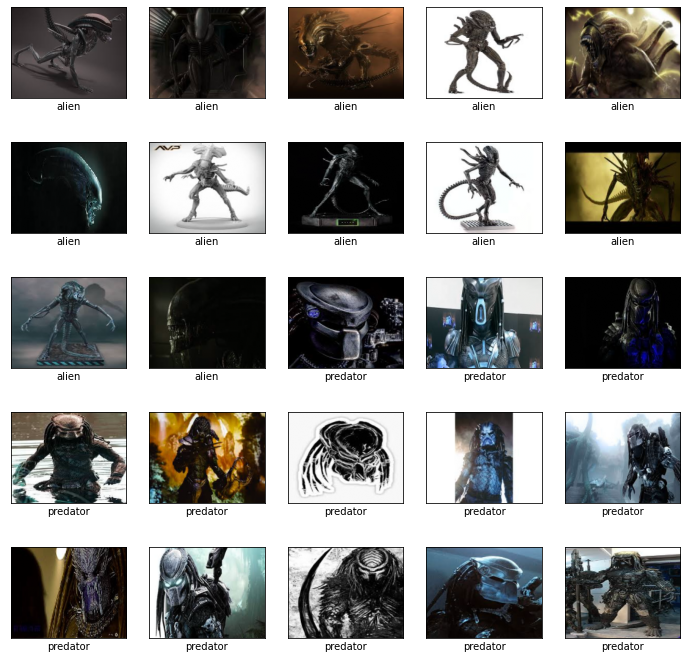

In [88]:
plt.figure(figsize=(12,12))#image size
for x, i in enumerate(range(335,360)): 
    plt.subplot(5,5,x+1) 
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap="binary_r")
    plt.xlabel(clases[y_train[i]])
plt.show()


In [89]:

#Using Keras Sequential and build the different layers.
model = keras.Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(150, 190,3))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(150, 190,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(AveragePooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 146, 186, 32)      2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 93, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 69, 89, 16)        12816     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 34, 44, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 40, 32)        12832     
_________________________________________________________________
average_pooling2d_2 (Average (None, 15, 20, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9600)             

In [90]:
# Choose the hyperparameters 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [91]:
#Fit the model
model.fit(X_train,y_train, epochs=10, verbose=1)

Epoch 1/10
22/22 [==============================] - 28s 1s/step - loss: 0.7841 - accuracy: 0.5173
Epoch 2/10
22/22 [==============================] - 28s 1s/step - loss: 0.6856 - accuracy: 0.5634
Epoch 3/10
22/22 [==============================] - 28s 1s/step - loss: 0.6140 - accuracy: 0.6686
Epoch 4/10
22/22 [==============================] - 28s 1s/step - loss: 0.5931 - accuracy: 0.7089
Epoch 5/10
22/22 [==============================] - 28s 1s/step - loss: 0.5180 - accuracy: 0.7522
Epoch 6/10
22/22 [==============================] - 28s 1s/step - loss: 0.5355 - accuracy: 0.7262
Epoch 7/10
22/22 [==============================] - 28s 1s/step - loss: 0.4899 - accuracy: 0.7550
Epoch 8/10
22/22 [==============================] - 30s 1s/step - loss: 0.4904 - accuracy: 0.7637
Epoch 9/10
22/22 [==============================] - 28s 1s/step - loss: 0.4039 - accuracy: 0.8228
Epoch 10/10
22/22 [==============================] - 28s 1s/step - loss: 0.3743 - accuracy: 0.8285


In [92]:
#Evaluate the test accuracy
test_loss, test_acc = model.evaluate(X_test,  y_test)

print('\nTest accuracy:', test_acc)

7/7 [==============================] - 2s 266ms/step - loss: 0.5615 - accuracy: 0.7100

Test accuracy: 0.7099999785423279


In [93]:
#Predict 
predictions = model.predict(X_test)

In [94]:
#Print a prediction´s example
print(predictions[91])

[0.21523455 0.7847654 ]


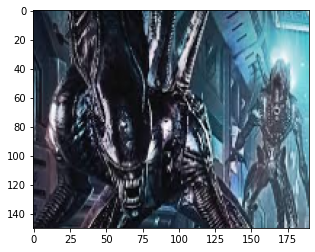

In [95]:
plt.imshow(X_test[91], cmap="binary_r")
plt.show()

In [96]:
history = model.fit(X_train,y_train, epochs=10, verbose=1)

Epoch 1/10
22/22 [==============================] - 28s 1s/step - loss: 0.3074 - accuracy: 0.8804
Epoch 2/10
22/22 [==============================] - 28s 1s/step - loss: 0.3166 - accuracy: 0.8631
Epoch 3/10
22/22 [==============================] - 28s 1s/step - loss: 0.2279 - accuracy: 0.9092
Epoch 4/10
22/22 [==============================] - 28s 1s/step - loss: 0.1932 - accuracy: 0.9135
Epoch 5/10
22/22 [==============================] - 28s 1s/step - loss: 0.1425 - accuracy: 0.9496
Epoch 6/10
22/22 [==============================] - 28s 1s/step - loss: 0.1126 - accuracy: 0.9669
Epoch 7/10
22/22 [==============================] - 28s 1s/step - loss: 0.0755 - accuracy: 0.9741
Epoch 8/10
22/22 [==============================] - 28s 1s/step - loss: 0.0485 - accuracy: 0.9885
Epoch 9/10
22/22 [==============================] - 28s 1s/step - loss: 0.0312 - accuracy: 0.9928
Epoch 10/10
22/22 [==============================] - 28s 1s/step - loss: 0.0481 - accuracy: 0.9798


In [97]:
history

In [98]:
#Accuracy data from history
history.history["accuracy"]

[0.880403459072113,
 0.8631123900413513,
 0.909221887588501,
 0.9135446548461914,
 0.9495677351951599,
 0.9668588042259216,
 0.9740633964538574,
 0.9884726405143738,
 0.9927954077720642,
 0.9798271059989929]

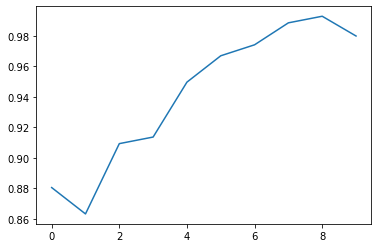

In [99]:
plt.plot(history.history["accuracy"])
plt.show()

In [100]:
#With this function we could create the plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

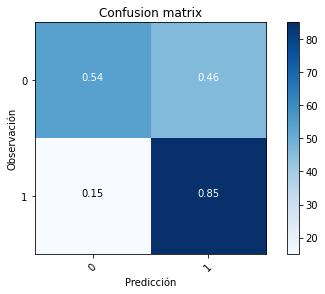

In [101]:
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
Y_true =y_test#= np.argmax(test_labels, axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [ ]:
#The confusion_matrix , guess right 54% true negative 0 and 85% true positive 1

In [102]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(y_test[predicted_label],
                                100*np.max(predictions_array),
                                clases[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(2))
    plt.yticks([])
    thisplot = plt.bar(range(2), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

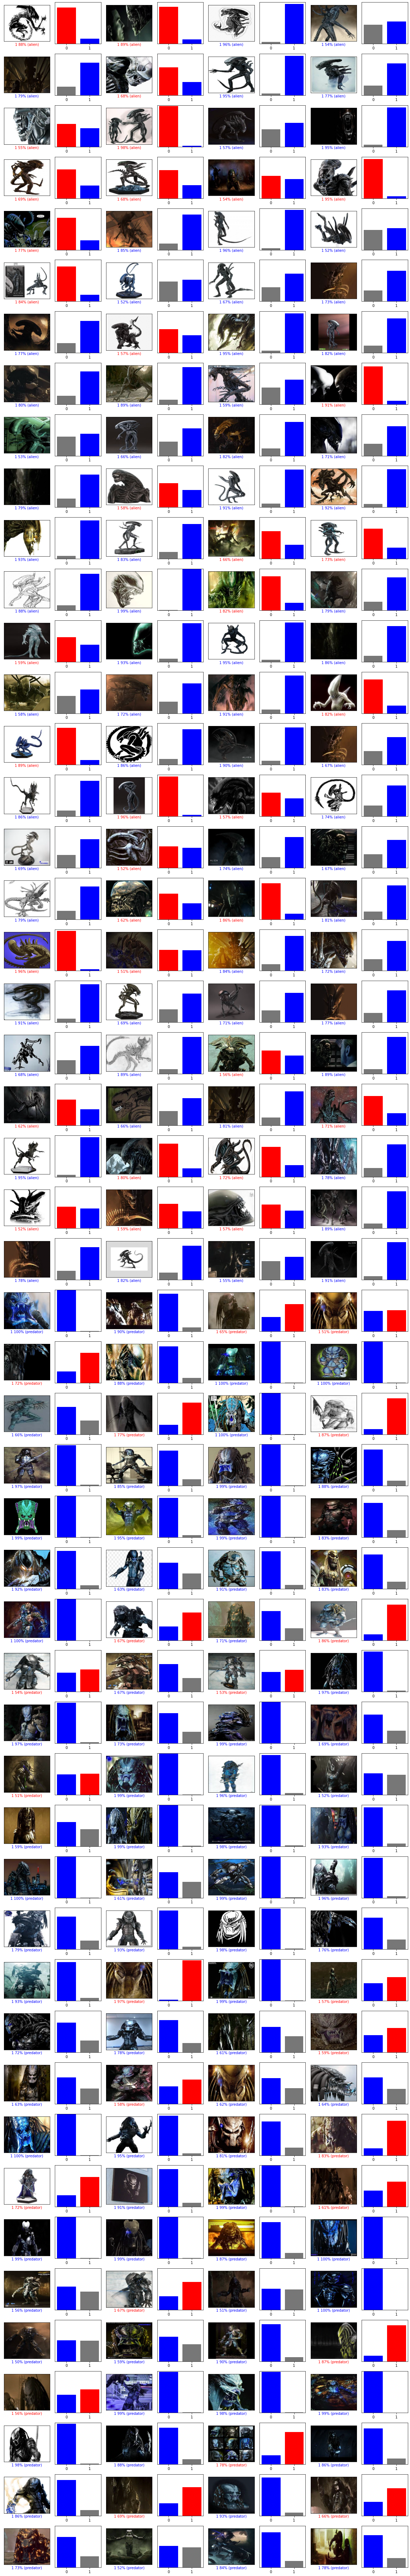

In [103]:
num_rows = 50
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [ ]:
#The conclusion of this notebook is with the previous parameters we get a 70% of accuracy on our alien vs predator classificator